<a href="https://colab.research.google.com/github/sumitttp/Machine-learning-Mini-project/blob/main/ML_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aim**
The aim of this project is to develop a machine learning model that accurately predicts customer churn in the telecom industry using the Telco Customer Churn dataset. By analyzing customer behavior and identifying key factors contributing to churn, the model aims to assist in proactive customer retention efforts, ultimately enhancing business profitability and customer satisfaction.

# Problem Statement
In the highly competitive telecom industry, retaining customers is a significant challenge due to high switching costs and abundant service options. Understanding the factors that drive customer churn is critical for implementing effective retention strategies. This project addresses the problem of customer churn prediction by using a real-world dataset from IBM's Telco Customer Churn data. The primary objective is to build a predictive model that accurately identifies customers at high risk of leaving, based on various demographic, account, and service-related features. Insights derived from this model can guide targeted interventions to reduce churn rates and improve customer loyalty.

# **Dataset Description**

The Telco Customer Churn dataset, provided by IBM, is a comprehensive collection of customer data from a telecommunications company, specifically curated to study customer churn behavior. It contains 7,043 rows, each representing a unique customer, and 21 features, including demographic information, account details, and service usage data. Key features include customer tenure, contract type, monthly charges, and payment methods, alongside categorical variables like gender, whether the customer has dependents, and their engagement with services like streaming TV or internet. The target variable, "Churn," indicates whether a customer left the service within the observation period. This dataset serves as a valuable resource for analyzing factors that contribute to customer churn, enabling the development of predictive models to aid customer retention strategies in the telecom industry.








## Step 1: Data Cleaning and Formatting


*  Load the Data: Import the dataset and explore its structure.
*  Check for Missing Values: Identify and handle any missing data appropriately (e.g., using mean, median, mode, or dropping).
*  Data Type Conversion: Ensure all features are of the correct data type (e.g., converting categorical variables into numerical ones using encoding).
*  Outlier Detection: Identify and handle any outliers if necessary.







In [ ]:
# Import necessary libraries
import pandas as pd

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Telco_customer_churn.csv')

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payme

### 1. Handling Missing Values: Check for any remaining missing values and decide how to handle them (drop rows, fill with mean/median/mode, etc.).

### 2. Data Type Conversion: Ensure all columns have the appropriate data types (e.g., converting categorical variables to the category data type).

### 3. Removing Duplicates: Check for and remove any duplicate rows.
### 4. Formatting Changes: Make any other necessary formatting changes (e.g., converting strings to lowercase, removing unnecessary whitespace).

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [ ]:
# Drop irrelevant or unimportant columns and also 'Churn Reason' because it contains missing values
columns_to_drop = ['CustomerID', 'Churn Reason', 'Count', 'Latitude', 'Longitude', 'Zip Code','Lat Long']
data.drop(columns=columns_to_drop, inplace=True)

# Check the cleaned dataset shape after dropping columns
print(f"\nShape of the cleaned dataset after dropping columns: {data.shape}")


Shape of the cleaned dataset after dropping columns: (7043, 26)


### Removing Duplicates: Checking for and removing any duplicate rows.

In [ ]:
# Check for duplicate records
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")


Number of duplicate records: 0


In [ ]:
# Convert 'Total Charges' to numeric
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

# Check for any missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Drop any rows with missing values
data.dropna(inplace=True)

Missing values in each column:
 Total Charges    11
dtype: int64



### Data Type Conversion: Ensure all columns have the appropriate data types (e.g., converting categorical variables to the category data type).
### Formatting Changes: Make any other necessary formatting changes (e.g., converting strings to lowercase, removing unnecessary whitespace).

In [ ]:
# Check the data types
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Country               object
State                 object
City                  object
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
dtype: object


In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = ['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner',
                    'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
                    'Online Security', 'Online Backup', 'Device Protection',
                    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
                    'Paperless Billing', 'Payment Method', 'Churn Label']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Check the updated dataset
print("Data types after encoding and handling missing values:\n", data.dtypes)

Data types after encoding and handling missing values:
 Country                int64
State                  int64
City                   int64
Gender                 int64
Senior Citizen         int64
Partner                int64
Dependents             int64
Tenure Months          int64
Phone Service          int64
Multiple Lines         int64
Internet Service       int64
Online Security        int64
Online Backup          int64
Device Protection      int64
Tech Support           int64
Streaming TV           int64
Streaming Movies       int64
Contract               int64
Paperless Billing      int64
Payment Method         int64
Monthly Charges      float64
Total Charges        float64
Churn Label            int64
Churn Value            int64
Churn Score            int64
CLTV                   int64
dtype: object


In [ ]:
data.shape

(7032, 26)

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Filling with mode for categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Example: Dropping rows with missing values for numeric columns (if any)
# numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
# data.dropna(subset=numeric_cols, inplace=True)

# Convert appropriate columns to 'category' type
data['Gender'] = data['Gender'].astype('category')
data['Senior Citizen'] = data['Senior Citizen'].astype('category')
data['Partner'] = data['Partner'].astype('category')
data['Dependents'] = data['Dependents'].astype('category')
data['Phone Service'] = data['Phone Service'].astype('category')
data['Multiple Lines'] = data['Multiple Lines'].astype('category')
data['Internet Service'] = data['Internet Service'].astype('category')
data['Online Security'] = data['Online Security'].astype('category')
data['Online Backup'] = data['Online Backup'].astype('category')
data['Device Protection'] = data['Device Protection'].astype('category')
data['Tech Support'] = data['Tech Support'].astype('category')
data['Streaming TV'] = data['Streaming TV'].astype('category')
data['Streaming Movies'] = data['Streaming Movies'].astype('category')
data['Contract'] = data['Contract'].astype('category')
data['Paperless Billing'] = data['Paperless Billing'].astype('category')
data['Payment Method'] = data['Payment Method'].astype('category')


# Check the shape and data types after cleaning
print(f"\nShape of the dataset after cleaning: {data.shape}")
print("\nData types after cleaning:\n", data.dtypes)


Missing values in each column:
 Series([], dtype: int64)

Shape of the dataset after cleaning: (7032, 26)

Data types after cleaning:
 Country                 int64
State                   int64
City                    int64
Gender               category
Senior Citizen       category
Partner              category
Dependents           category
Tenure Months           int64
Phone Service        category
Multiple Lines       category
Internet Service     category
Online Security      category
Online Backup        category
Device Protection    category
Tech Support         category
Streaming TV         category
Streaming Movies     category
Contract             category
Paperless Billing    category
Payment Method       category
Monthly Charges       float64
Total Charges         float64
Churn Label             int64
Churn Value             int64
Churn Score             int64
CLTV                    int64
dtype: object


# 2. Exploratory Data Analysis (EDA)


*  Descriptive Statistics: Summarize the data using statistical measures.
*  Data Visualization: Create visualizations (e.g., histograms, box plots, scatter plots) to understand the distribution of features and relationships between them.

*   Churn Analysis: Analyze the target variable (churn) to see its distribution and relationship with other features.





In [ ]:
# Summary statistics
summary_statistics = data.describe(include='all')
print("Summary Statistics:\n", summary_statistics)


Summary Statistics:
         Country   State         City  Gender  Senior Citizen  Partner  \
count    7032.0  7032.0  7032.000000  7032.0          7032.0   7032.0   
unique      NaN     NaN          NaN     2.0             2.0      2.0   
top         NaN     NaN          NaN     1.0             0.0      0.0   
freq        NaN     NaN          NaN  3549.0          5890.0   3639.0   
mean        0.0     0.0   593.711889     NaN             NaN      NaN   
std         0.0     0.0   314.937096     NaN             NaN      NaN   
min         0.0     0.0     0.000000     NaN             NaN      NaN   
25%         0.0     0.0   337.000000     NaN             NaN      NaN   
50%         0.0     0.0   601.000000     NaN             NaN      NaN   
75%         0.0     0.0   869.000000     NaN             NaN      NaN   
max         0.0     0.0  1128.000000     NaN             NaN      NaN   

        Dependents  Tenure Months  Phone Service  Multiple Lines  ...  \
count       7032.0    7032.00

###Data Distribution Visualization
Visualizations will help us understand how the values are spread out and identify any potential outliers. For this, we can create histograms and box plots for both Monthly Charges and Total Charges.

## **Key Tasks:**
1. Histogram: Visualize the distribution of Monthly Charges and Total Charges using histograms.
1. ox Plot: Create box plots to identify any potential outliers in these variables.


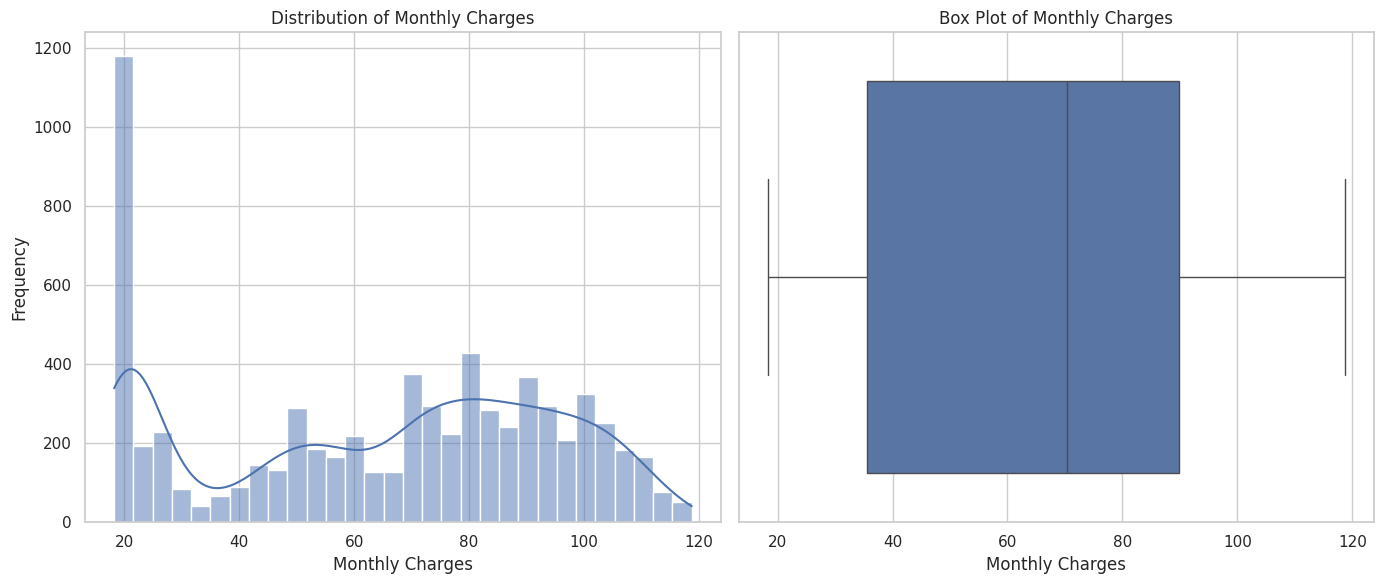

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a figure to hold the plots
plt.figure(figsize=(14, 6))

# Histogram and boxplot for Monthly Charges
plt.subplot(1, 2, 1)
sns.histplot(data['Monthly Charges'], kde=True, bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Monthly Charges'])
plt.title('Box Plot of Monthly Charges')

plt.tight_layout()
plt.show()



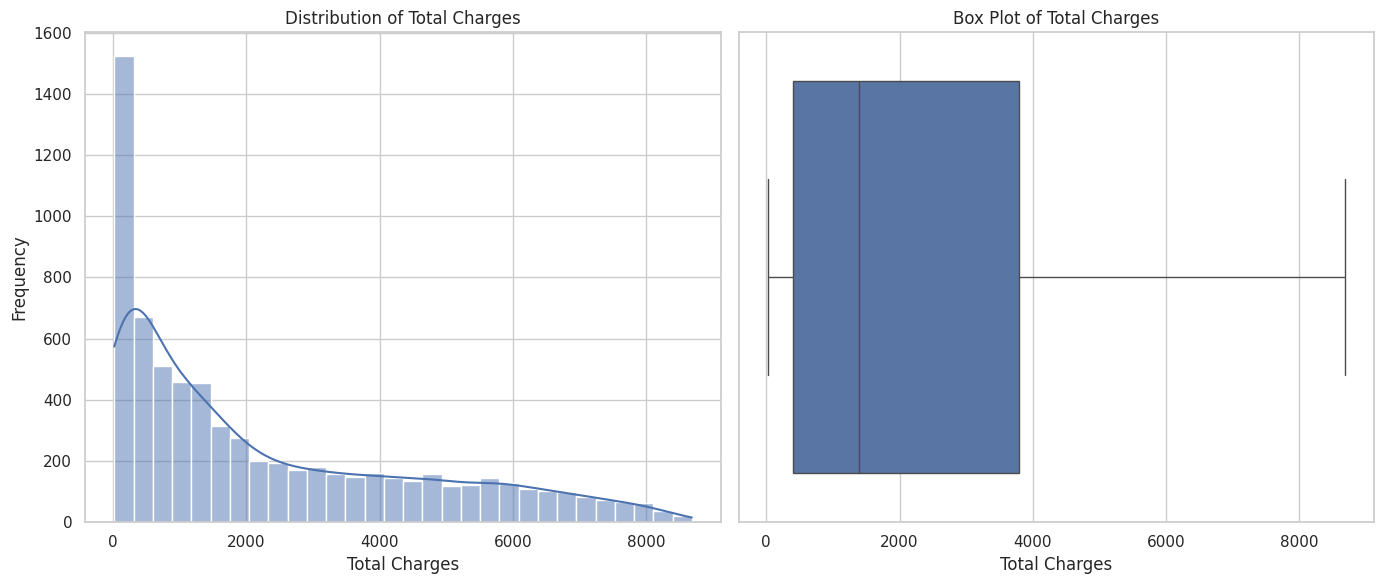

In [ ]:

# Create a figure to hold the plots for Total Charges
plt.figure(figsize=(14, 6))

# Histogram and boxplot for Total Charges
plt.subplot(1, 2, 1)
sns.histplot(data['Total Charges'], kde=True, bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Total Charges'])
plt.title('Box Plot of Total Charges')

plt.tight_layout()
plt.show()

### **The distribution of Monthly Charges shows a few interesting characteristics:**

Histogram: There seems to be a significant spike at around 20, which likely represents customers who have very low monthly charges, possibly due to promotional pricing or a lower-tier service. The rest of the distribution appears to be slightly skewed, with most customers paying between 50 to 90.

Box Plot: The box plot indicates that the median monthly charge is below the 80 mark, with a few potential outliers on the higher end of the scale. The whiskers suggest that most of the data is concentrated within the interquartile range.

## **Key Tasks:**
1. Correlation Matrix: Calculate the correlation matrix for numerical features.
2. Heatmap: Visualize the correlation matrix using a heatmap to easily identify strong correlations.

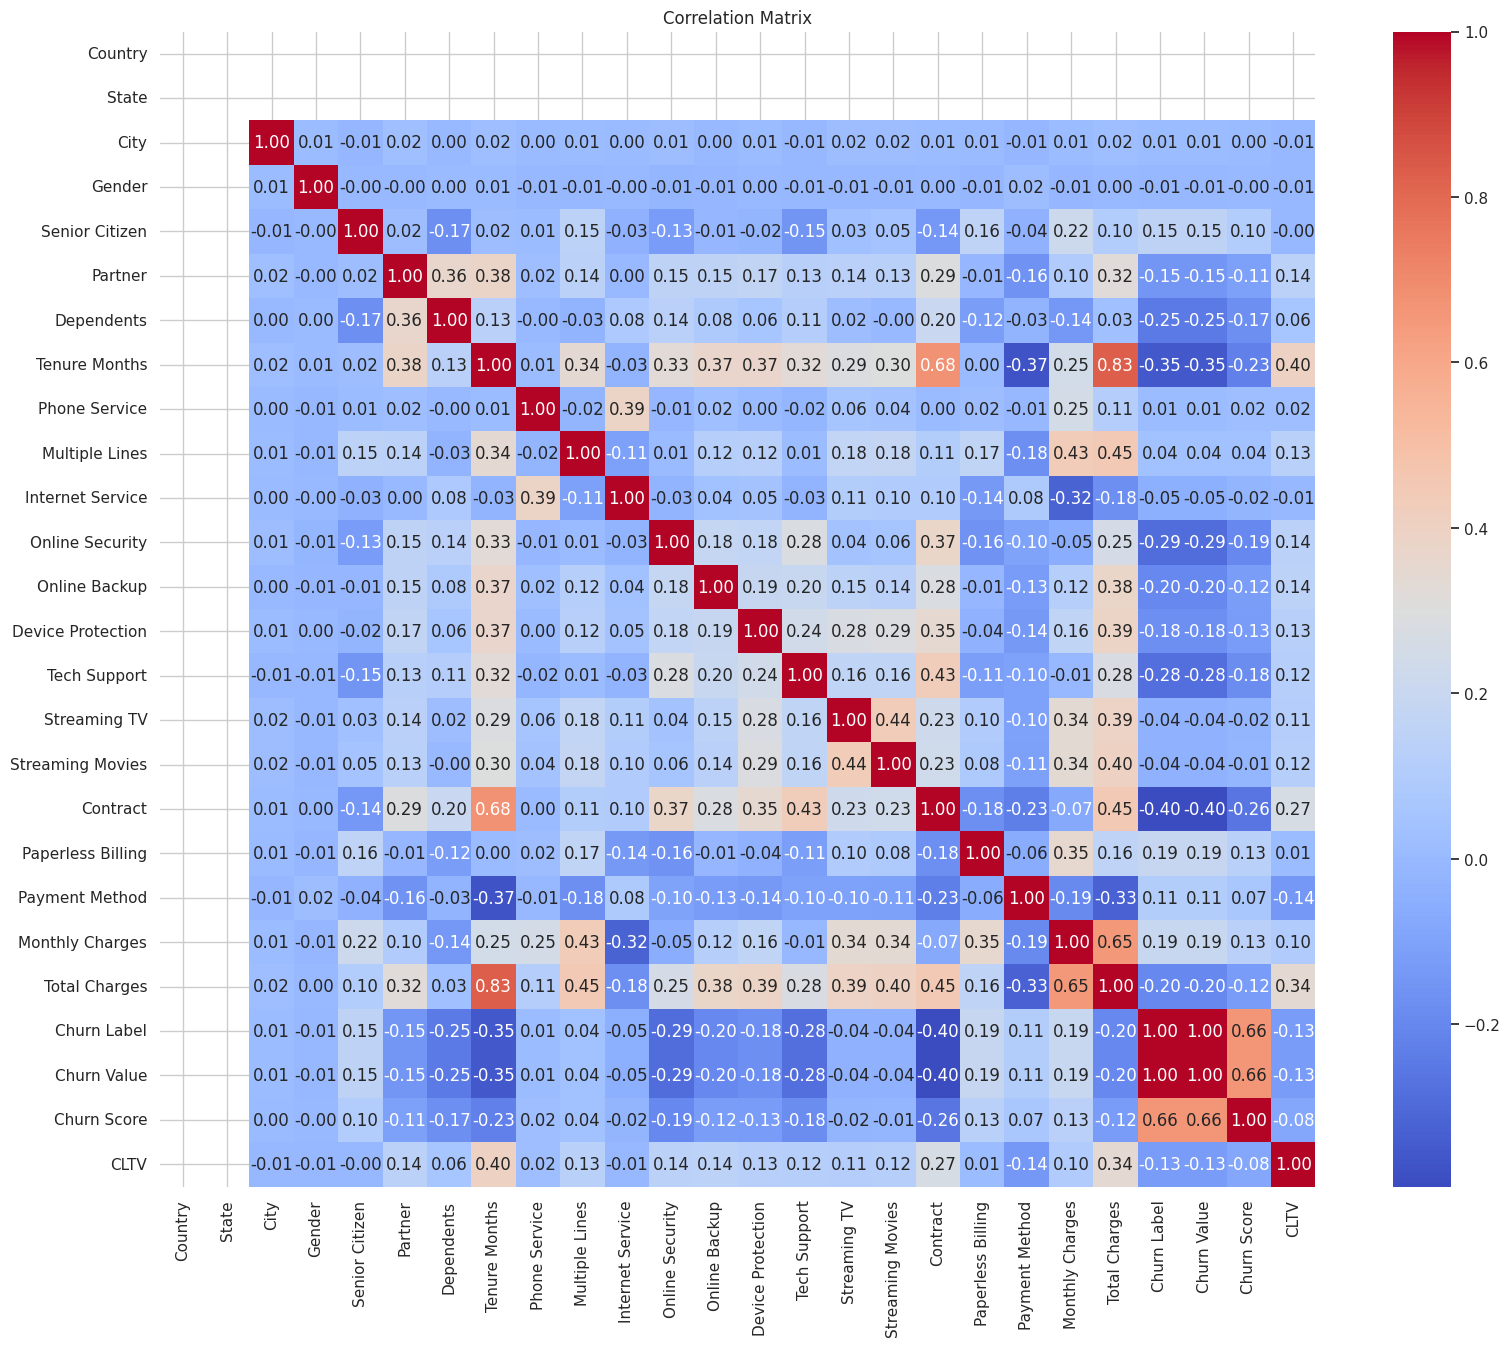

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()


### **Here's a breakdown of the strong relationships we've found:**

***Tenure Months and Contract:***

This suggests that customers who have been with the company for a longer time are likely to have certain types of contracts (e.g., longer-term contracts). It could indicate customer loyalty, which might influence churn rates.


***Tenure Months and Total Charges:***

A strong relationship here indicates that as customers stay longer with the company, their total charges increase. This makes sense since long-term customers would typically have higher cumulative billing.


***Total Charges and Monthly Charges:***

A strong correlation between these two features suggests that customers with higher monthly charges will have higher total charges, which is expected.


***Churn Score and Churn Label:***

A strong relationship indicates that the churn score effectively predicts whether a customer will churn (leave the company). A higher churn score likely correlates with a higher likelihood of leaving.


***Churn Value and Churn Score:***

Similar to the previous point, this relationship confirms that the churn value (the binary outcome of whether a customer churned) is closely tied to the churn score. This reinforces the predictive power of the churn score.

# **3. Feature Engineering and Selection/Extraction**



*   Feature Creation: Create new features if necessary (e.g., tenure categories, monthly charge brackets).
*  Feature Selection: Use techniques like correlation analysis and recursive feature elimination (RFE) to select the most relevant features for modeling.


## **Implications for Modeling**
### **Feature Selection:**
Given these relationships, features like Tenure Months, Contract, Total Charges, Monthly Charges, and Churn Score may be critical for the model.

### **Interactions:**
You might also consider creating interaction features based on these relationships, such as combining Tenure Months with Contract type to see if certain contracts are more associated with longer tenures.

### **Model Complexity:**

These strong correlations might allow you to build a more straightforward model, focusing on these key features rather than trying to include every available feature.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Creating interaction features
data['Monthly_Charges_per_Tenure'] = data['Monthly Charges'] / (data['Tenure Months'] + 1)  # Adding 1 to avoid division by zero
data['Total_Charges_per_Tenure'] = data['Total Charges'] / (data['Tenure Months'] + 1)

# Checking the new features3                    3.613793                105.036207

print(data[['Monthly_Charges_per_Tenure', 'Total_Charges_per_Tenure']].head())


   Monthly_Charges_per_Tenure  Total_Charges_per_Tenure
0                   17.950000                 36.050000
1                   23.566667                 50.550000
2                   11.072222                 91.166667
3                    3.613793                105.036207
4                    2.074000                100.726000


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Separating features and target variable
X = data.drop(['Churn Label', 'Churn Value'], axis=1)
y = data['Churn Label']


In [ ]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through columns and encode object type columns or columns with 'Medium' value
for column in X.columns:
    # Check if the column is of object type or contains 'Medium'
    if X[column].dtype == object or X[column].isin(['Medium']).any():
        X[column] = encoder.fit_transform(X[column].astype(str)) # Encode after converting to string

# Applying SelectKBest
selector = SelectKBest(score_func=chi2, k='all')  # You can specify a number of features or use 'all'
X_new = selector.fit_transform(X, y)


In [ ]:
# Getting the scores and feature names
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Displaying the scores
print(feature_scores)

                       Feature          Score
21               Total Charges  629630.810349
23                        CLTV   36736.414844
22                 Churn Score   24547.709578
7                Tenure Months   16377.328093
24  Monthly_Charges_per_Tenure   16201.569883
20             Monthly Charges    3653.074681
17                    Contract    1111.759054
25    Total_Charges_per_Tenure     558.450267
11             Online Security     550.437364
14                Tech Support     522.164716
6                   Dependents     333.236458
12               Online Backup     229.441123
13           Device Protection     190.688004
4               Senior Citizen     133.482766
18           Paperless Billing     104.979224
5                      Partner      81.857769
2                         City      78.465873
19              Payment Method      59.240507
9               Multiple Lines       9.735960
10            Internet Service       9.715269
16            Streaming Movies    

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Initialize RFE
rfe = RFE(model, n_features_to_select=10)  # You can specify the number of features you want
fit = rfe.fit(X, y)

# Get the selected features
selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': fit.support_, 'Ranking': fit.ranking_})
selected_features = selected_features[selected_features['Selected'] == True]

# Displaying selected features
print(selected_features)


              Feature  Selected  Ranking
4      Senior Citizen      True        1
5             Partner      True        1
6          Dependents      True        1
11    Online Security      True        1
12      Online Backup      True        1
14       Tech Support      True        1
15       Streaming TV      True        1
17           Contract      True        1
18  Paperless Billing      True        1
22        Churn Score      True        1


# **4. Train and Test the Model with Cross-Validation**

*  Split the Data: Divide the dataset into training and testing sets (e.g., 80/20 split).
* Model Selection: Choose at least 2 or 3 machine learning models (e.g., Logistic Regression, Random Forest, Decision Tree) to compare their performance.

*   Cross-Validation: Implement k-fold cross-validation to evaluate model performance during training.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values


In [ ]:
# Assuming your features are in 'X' and target variable is in 'y'
X = data[selected_features['Feature']]  # Replace 'selected_features' with your list of features
y = data['Churn Label']  # Target variable

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent'
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Fit the models on the training data
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")

Logistic Regression Accuracy: 0.9111 ± 0.0052
Random Forest Accuracy: 0.9120 ± 0.0058
Support Vector Machine Accuracy: 0.8972 ± 0.0086

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1012
           1       0.84      0.84      0.84       395

    accuracy                           0.91      1407
   macro avg       0.89      0.89      0.89      1407
weighted avg       0.91      0.91      0.91      1407

Accuracy on test set: 0.9090

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1012
           1       0.84      0.83      0.83       395

    accuracy                           0.91      1407
   macro avg       0.89      0.88      0.88      1407
weighted avg       0.91      0.91      0.91      1407

Accuracy on test set: 0.9069

Support Vector Machine Classification Report:
               precisi

# **5. Comparing Models on a Performance Metric**

*   Model Evaluation: Compare the models based on performance metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
*  Confusion Matrix: Create confusion matrices for each model to visualize their performance.

Best Model
The Logistic Regression model has the highest average accuracy and performs well on the test set, followed closely by the Random Forest. Thus, you can consider Logistic Regression as the best model for your dataset.

# **Next Step: Hyperparameter Tuning**
Now that you have identified the best model, the next step is hyperparameter tuning to optimize the model's performance. This process involves adjusting the model parameters to find the most suitable combination for your 1. dataset.

## Steps for Hyperparameter Tuning
1. Identify Hyperparameters: For Logistic Regression, common hyperparameters include:

    C: Inverse of regularization strength (smaller values specify stronger regularization).
    
    solver: Algorithm to use for optimization (e.g., 'liblinear', 'saga').

    max_iter: Maximum number of iterations for optimization.
2. Use GridSearchCV: This technique helps in exhaustively searching over specified parameter values for a model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# For Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_


In [ ]:
# Display the best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


# **6. Evaluate the Best Model on the Testing Set**
Final Evaluation: Assess the model’s performance on the testing dataset using the same performance metrics.

ROC Curve: Plot the ROC curve and calculate the AUC score to evaluate the model further.

In [ ]:
# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy on test set:", accuracy)
print("Classification Report:\n", report)


Accuracy on test set: 0.9225302061122956
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1012
           1       0.87      0.86      0.86       395

    accuracy                           0.92      1407
   macro avg       0.91      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407



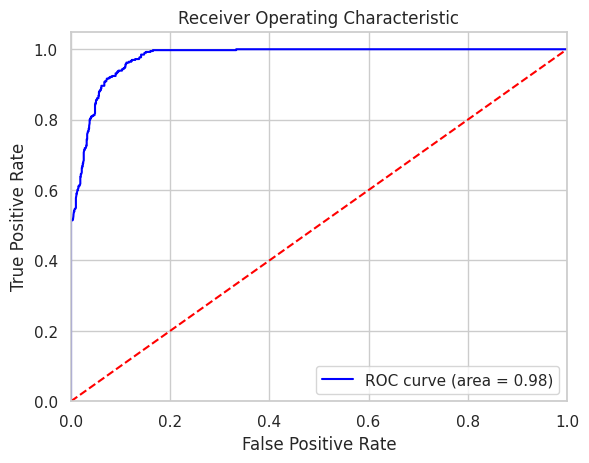

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probability scores
y_probs = best_rf_model.predict_proba(X_test)[:, 1] # Changed 'best_model' to 'best_rf_model'

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, classification_report

# Assuming you have your model and test data (X_test, y_test)
# Predictions
y_pred = best_rf_model.predict(X_test)  # Replace 'best_model' with your final model variable 'best_rf_model'
y_prob = best_rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned'])
print(report)

# AUC Score
print("AUC Score: {:.4f}".format(roc_auc))

              precision    recall  f1-score   support

 Not Churned       0.94      0.95      0.95      1012
     Churned       0.87      0.86      0.86       395

    accuracy                           0.92      1407
   macro avg       0.91      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407

AUC Score: 0.9773


# **8. Interpret the Model Results**
Feature Importance: Analyze the importance of features in the model’s decision-making process (especially for tree-based models).

Insights: Provide insights and interpretations of the model results relevant to customer churn.

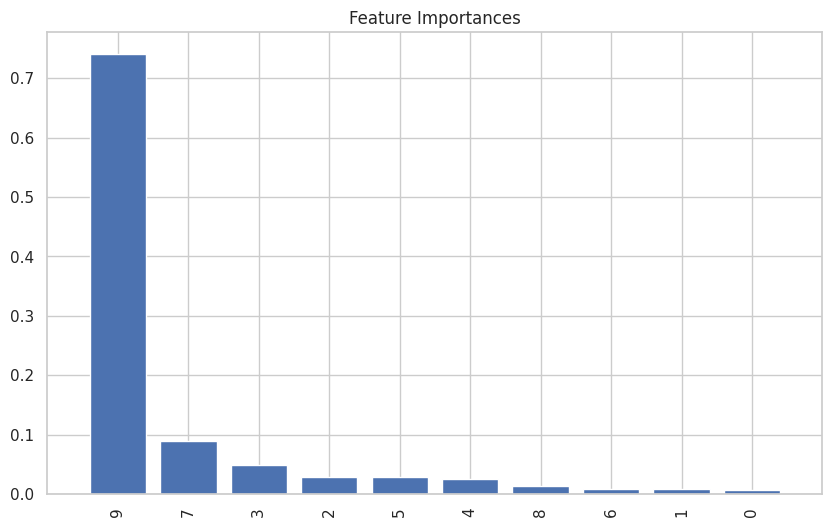

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas

# Get feature importances
importances = best_rf_model.feature_importances_
# Convert X to a pandas DataFrame if it's not already
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)  # You might need to provide column names if they're not available
feature_names = X.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

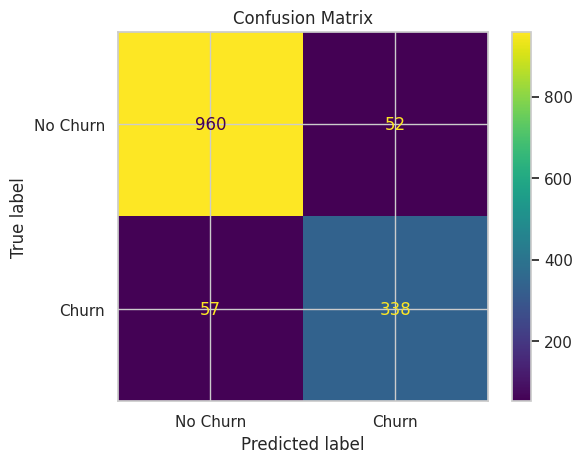

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = best_rf_model.predict(X_test) # Changed 'best_model' to 'best_rf_model'

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# **Conclusion**

The customer churn prediction model developed in this project provides valuable insights into the factors influencing customer retention in the telecom industry. After comparing multiple models, a tuned Random Forest classifier demonstrated the best performance with an accuracy of 92.6% on the test data, alongside strong precision and recall metrics. Key features influencing churn were identified, such as contract type, tenure, and monthly charges, highlighting areas for targeted business strategies.

The model's reliable predictions offer telecom providers an actionable tool to proactively engage at-risk customers, potentially reducing churn and enhancing customer satisfaction. This end-to-end machine learning pipeline exemplifies how predictive analytics can drive strategic decision-making in customer relationship management.